In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [3]:
import seaborn as sns

In [45]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']=='United States') & (df['salary_year_avg'].notna())].copy()

In [46]:
df_da_us = df_da_us.explode('job_skills')	
df_us_group = df_da_us.groupby(by=['job_skills']).agg(
  job_count=('job_title_short','count'),
  median_salary=('salary_year_avg','median'), 
)
df_top_demand = df_us_group.sort_values(by='job_count',ascending=False).head(10).sort_values(by='median_salary',ascending=False)
df_top_pay = df_us_group.sort_values(by='median_salary',ascending=False).head(10)

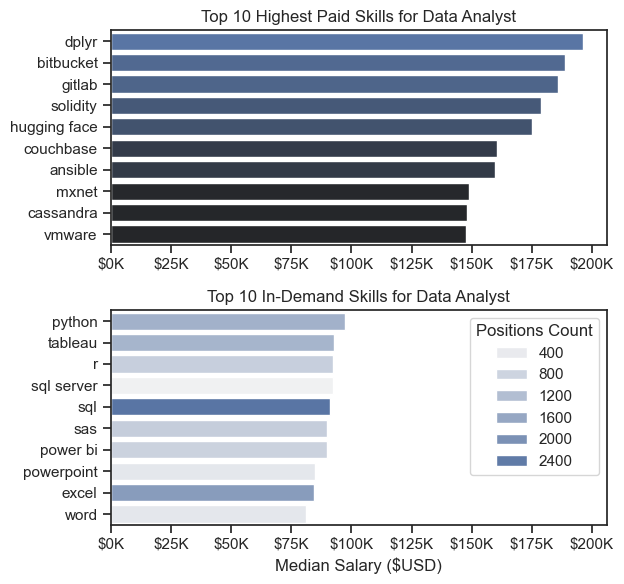

In [47]:
from matplotlib.ticker import FuncFormatter

(fig, ax) = plt.subplots(2,1)
fig.set_figheight(6)

sns.set_theme(style="ticks")

# df_top_pay.plot(kind='barh', y='median_salary', legend=False, ax=ax[0], fig=fig)	
# df_top_demand.plot(kind='barh', y='median_salary', ax=ax[1], fig=fig)
sns.barplot(data=df_top_pay, x='median_salary', y=df_top_pay.index, legend=False, ax=ax[0], hue='median_salary', palette="dark:b")
sns.barplot(data=df_top_demand, x='median_salary', y=df_top_demand.index, ax=ax[1], hue='job_count', palette="light:b")

ax[0].set_title("Top 10 Highest Paid Skills for Data Analyst")
ax[1].set_title("Top 10 In-Demand Skills for Data Analyst")

xlim = max([axis.get_xlim() for axis in ax])

for axis in ax:
  axis.set_xlim(xlim)
  axis.set_ylabel("")
  axis.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f"${int(x/1000)}K"))
  axis.set_xlabel("") 
  #axis.invert_yaxis()
  #axis.legend().set_visible(False)	

ax[1].legend(title='Positions Count')
ax[1].set_xlabel("Median Salary ($USD)")  

fig.tight_layout()
fig.subplots_adjust()
plt.show()

In [41]:
df_da_us = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States') & (df['salary_year_avg'].notna())].copy()

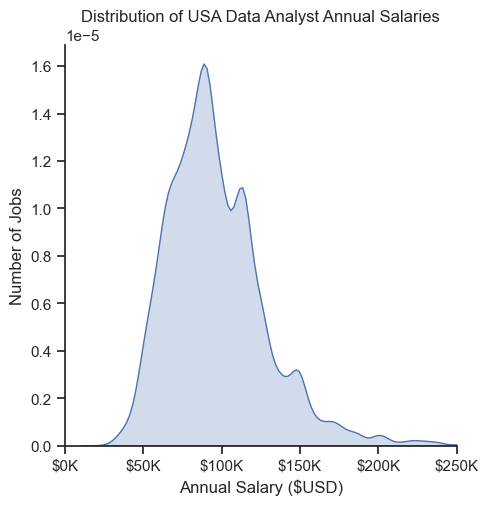

In [48]:
from matplotlib.ticker import FuncFormatter

#df_da_us['salary_year_avg'].plot(kind='hist',bins=40, edgecolor='black')
sns.displot(df_da_us['salary_year_avg'],kind='kde', fill=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f"${int(x/1000)}K"))

plt.xlim((0,250_000))

plt.xlabel('Annual Salary ($USD)')
plt.ylabel('Number of Jobs')
plt.title("Distribution of USA Data Analyst Annual Salaries")
plt.show()

In [ ]:
df_us = df[(df['job_country']=='United States') & (df['salary_year_avg'].notna())].copy()
job_titles = ['Data Analyst','Data Engineer','Data Scientist']
job_list = [df_us[df_us['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
df_us_top_titles = df_us[df_us['job_title_short'].isin(job_titles)]

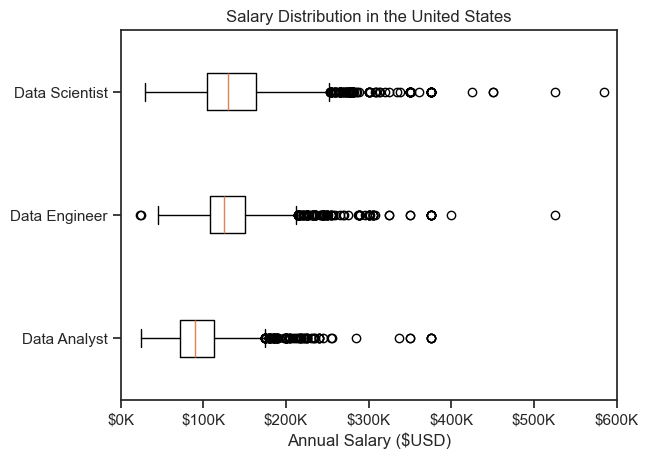

In [50]:
from matplotlib.ticker import FuncFormatter
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f"${int(x/1000)}K"))
plt.xlim((0,600_000))
plt.xlabel('Annual Salary ($USD)')
plt.title("Salary Distribution in the United States")
plt.show()

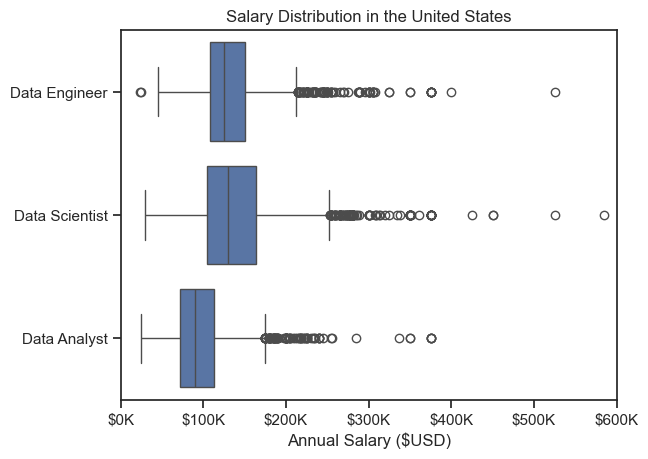

In [53]:
from matplotlib.ticker import FuncFormatter
sns.boxplot(df_us_top_titles, x='salary_year_avg', y='job_title_short')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f"${int(x/1000)}K"))
plt.xlim((0,600_000))
plt.xlabel('Annual Salary ($USD)')
plt.ylabel("")
plt.title("Salary Distribution in the United States")
plt.show()